##### Purpose of the notebook ####

Explore gene modules present within different cell types, defining subtypes. In this case: oligodendrocytes.

In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import infercnvpy as cnv

/home/sergio/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# format to adata using modules from xenium benchmarking 

In [3]:
saving_path='/media/sergio/Ymir/5kovarian_for_cnv/figures'
adata=sc.read('/media/sergio/Ymir/5kovarian_for_cnv/adata_annotated.h5ad')

# CNV inference (regular)

In [4]:
adata.X=adata.layers['lognorm']

We want to run it without reference first to illustrate that epithelial cells are the ones with a higher number of CNVs

In [5]:
cnv.tl.infercnv(adata,reference_key="cell class",
reference_cat=['Monocytes','B cells','T cells','Endothelial','Low expression','Fibroblasts'],window_size=60,layer='lognorm')

100%|█████████████████████████████████████████████████████████████████████| 232/232 [00:40<00:00,  5.69it/s]


categories: B cells, Endothelial, Epithelial, etc.
var_group_labels: chr1, chr2, chr3, etc.


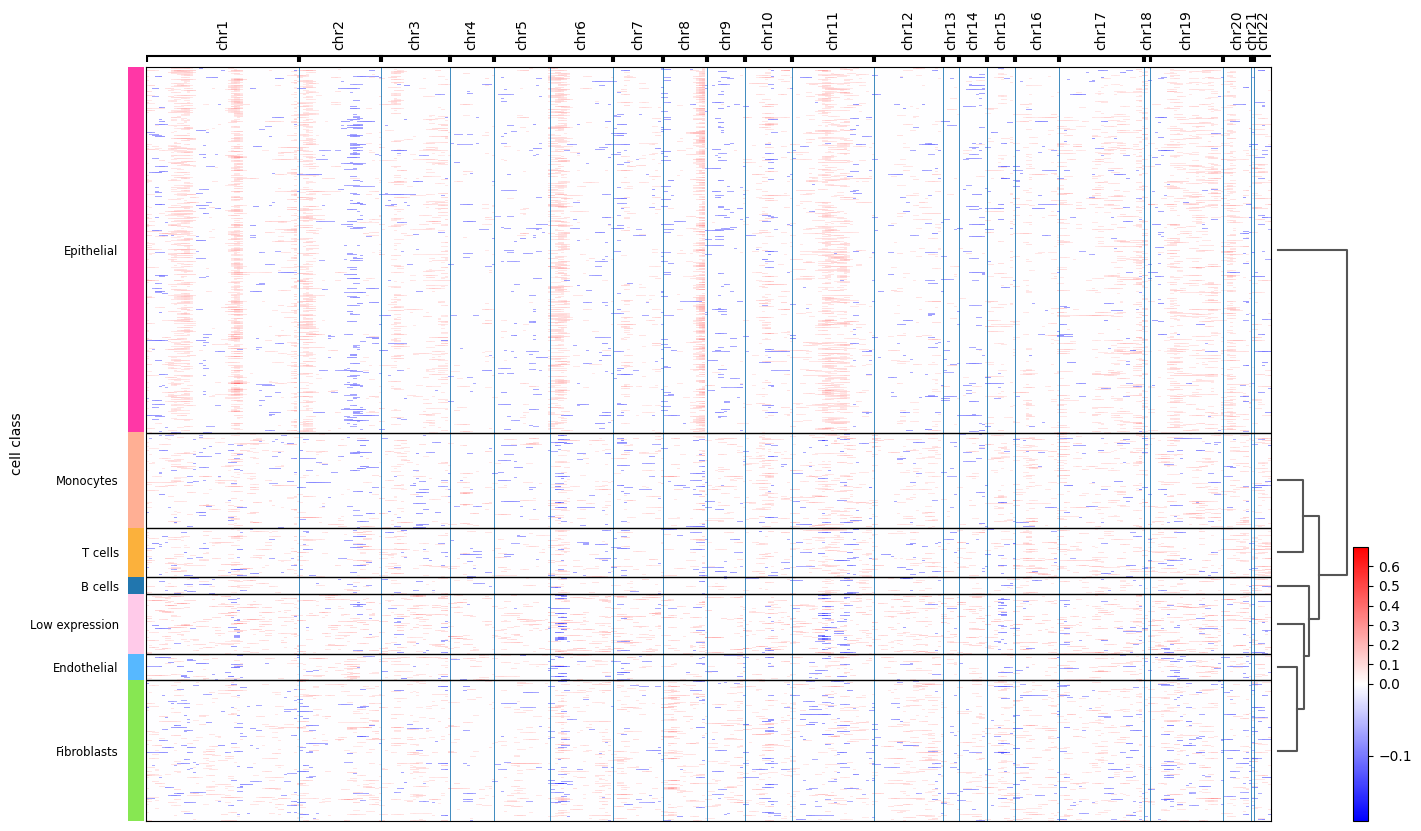

<Figure size 640x480 with 0 Axes>

In [15]:
cnv.tl.cnv_score(adata,use_rep='cnv',groupby='cell class')
cnv.pl.chromosome_heatmap(adata, groupby="cell class",dendrogram=True)
plt.savefig(saving_path+'/heatmap_cell_class_lognorm.pdf')

In [13]:
scores=adata.obs.loc[:,['cell class','cnv_score']].groupby('cell class').mean()

/tmp/ipykernel_157741/2793914957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores=adata.obs.loc[:,['cell class','cnv_score']].groupby('cell class').mean()


In [80]:
allscores=[]
for win_size in [30,60,90,120,150]:
    cnv.tl.infercnv(adata,window_size=win_size)
    cnv.tl.cnv_score(adata,use_rep='cnv',groupby='cell class')
    scores=adata.obs.loc[:,['cell class','cnv_score']].groupby('cell class').mean()
    scores.columns=[win_size]
    allscores.append(scores)

100%|█████████████████████████████████████████████████████████████████████████████████| 232/232 [00:35<00:00,  6.62it/s]


/tmp/ipykernel_53504/95685066.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores=adata.obs.loc[:,['cell class','cnv_score']].groupby('cell class').mean()
100%|█████████████████████████████████████████████████████████████████████████████████| 232/232 [00:36<00:00,  6.29it/s]


/tmp/ipykernel_53504/95685066.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores=adata.obs.loc[:,['cell class','cnv_score']].groupby('cell class').mean()
100%|█████████████████████████████████████████████████████████████████████████████████| 232/232 [00:34<00:00,  6.67it/s]


/tmp/ipykernel_53504/95685066.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores=adata.obs.loc[:,['cell class','cnv_score']].groupby('cell class').mean()
100%|█████████████████████████████████████████████████████████████████████████████████| 232/232 [00:32<00:00,  7.21it/s]


/tmp/ipykernel_53504/95685066.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores=adata.obs.loc[:,['cell class','cnv_score']].groupby('cell class').mean()
100%|█████████████████████████████████████████████████████████████████████████████████| 232/232 [00:35<00:00,  6.60it/s]
/tmp/ipykernel_53504/95685066.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores=adata.obs.loc[:,['cell class','cnv_score']].groupby('cell class').mean()


### Without any reference, we try to see if epithelial cells have a higher score (spoiler, it might not happen)
We will visualize if that is the case

<Figure size 500x500 with 0 Axes>

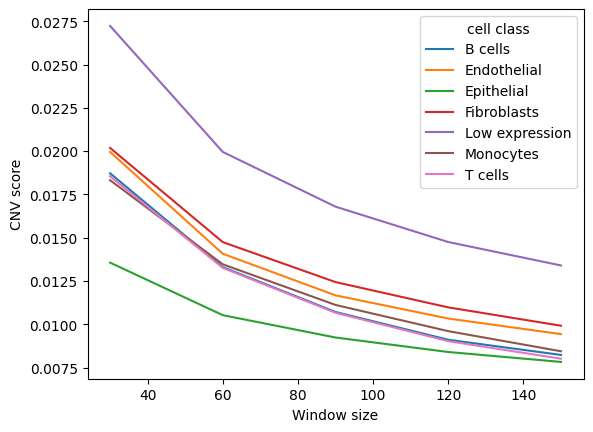

In [90]:
plt.figure(figsize=(5,5))
pd.concat(allscores,axis=1).transpose().plot()
plt.xlabel('Window size')
plt.ylabel('CNV score')
plt.savefig(saving_path+'cnv_score_across_window_sizes.pdf')

In [16]:
cnv.pp.neighbors(adata)

In [ ]:
cnv.tl.leiden(adata,resolution=0.3)
sc.tl.dendrogram(adata,groupby='cnv_leiden')
sc.pl.dendrogram(adata,groupby='cnv_leiden')

/home/sergio/.local/lib/python3.10/site-packages/infercnvpy/tl/__init__.py:24: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  return sc.tl.leiden(


In [ ]:
import matplotlib
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden",dendrogram=True,vmax=0.4,show=False)
plt.savefig(saving_path+'/heatmap_cnv_leiden_lognorm.pdf')

In [ ]:
import matplotlib
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.pl.spatial(adata,color='cnv_leiden',spot_size=50,frameon=False)
plt.savefig(saving_path+'/spatial_cnv_leiden_lognorm.pdf')

In [ ]:
saving_path='/media/sergio/Ymir/5kovarian_for_cnv/figures'
adata=sc.read('/media/sergio/Ymir/5kovarian_for_cnv/adata_annotated.h5ad')